In [53]:
import numpy as np
import pandas as pd

In [54]:
com = pd.read_csv("Comments.csv.gz", comment="#", compression="gzip")
comments = pd.DataFrame(data=com)
pos = pd.read_csv("Posts.csv.gz", comment="#", compression="gzip")
posts = pd.DataFrame(data=pos)
use = pd.read_csv("Users.csv.gz", comment="#", compression="gzip")
users = pd.DataFrame(data=use)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE860027C8>]],
      dtype=object)

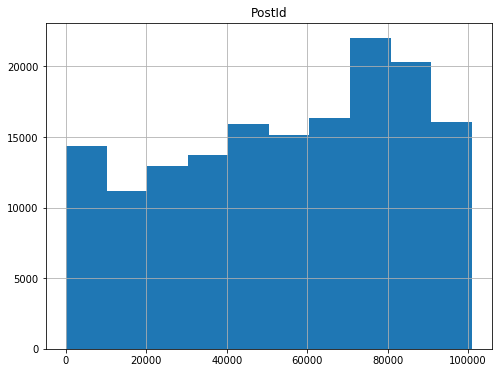

In [55]:
# Zadanie 1

comments.hist('PostId', figsize=(8,6))

In [56]:
# Zadanie 2 
posty = posts.groupby("OwnerUserId")\
    .sum()["ViewCount"]\
    .reset_index()
wynik = users.merge(posty, left_on="Id", right_on="OwnerUserId")\
    .sort_values(by="ViewCount", ascending=False)\
    .values[0,3]
wynik

'Mark Mayo'

In [57]:
# Zadanie 3
posty = posts[["AcceptedAnswerId","Id"]].dropna()\
    .merge(posts, on=["AcceptedAnswerId","Id"])\
    .groupby("OwnerUserId")\
    .count()["AcceptedAnswerId"]\
   .reset_index()\
    .rename(columns={'AcceptedAnswerId':'AcceptedAnswers'})
wynik = users.merge(posty, left_on="Id", right_on="OwnerUserId")\
        .sort_values(by="AcceptedAnswers", ascending=False)\
        .values[1,3]
wynik

'hippietrail'

In [58]:
# Zadanie 4
posty = posts[["AcceptedAnswerId","Id"]]\
    .dropna()\
    .merge(posts, on=["AcceptedAnswerId","Id"])
dlugosc_posty = len(posty)
dolacz = comments.groupby("PostId")\
    .max()["Score"]\
    .reset_index()\
    .rename(columns={"Score":"MaxScore"})
posty2 = posty.merge(dolacz, left_on = "Id", right_on="PostId")[["Id","Score","MaxScore"]]
odsetek = posty2[posty2["MaxScore"] > posty2["Score"]]
dlugosc_odsetek = len(odsetek)
dlugosc_odsetek/dlugosc_posty

0.08513231197771588